## Question 1

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np

In [2]:
df = pd.read_csv("framingham.csv")
# get the variables and observations
variables = df.shape[1]
observations = df.shape[0]

print(f"There are {variables} variables in the data set, and {observations} observations.")

There are 16 variables in the data set, and 4240 observations.


## Question 2

In [3]:
print(df.dtypes)

print(f"The glucose feature is a {df['glucose'].dtype} type")

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
The glucose feature is a float64 type


## Question 3

The feature that is most likely the response variable is the `TenYearCHD` column, as the purpose of the study seems to be to study various factor's effect on Cardiovascular disease, so the field indicating if they did or did not develop the Coronary Heart Disease in the ten years.

## Question 4

In [4]:
# drop the na values
cholVals = df['totChol'].dropna()
summary = cholVals.describe()

# print the mean, median, and stnd dev
print(f"Mean total cholesterol level: {round(summary['mean'], 2)}")
print(f"Median total cholesterol level: {round(cholVals.median(), 2)}")
print(f"Standard deviation of total cholesterol level: {round(summary['std'], 2)}")

Mean total cholesterol level: 236.7
Median total cholesterol level: 234.0
Standard deviation of total cholesterol level: 44.59


## Question 5

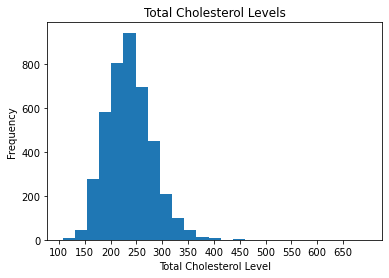

The skew statistic has a value of: 0.8718805634765355
This is a positive skew value, and means that the data is skewed right


In [5]:
# set up that thicc histogram
pp.hist(cholVals, 25)
pp.title("Total Cholesterol Levels")
pp.xlabel("Total Cholesterol Level")
pp.ylabel("Frequency")
pp.xticks(np.arange(100, summary['max'], 50)) # going in groups of 50
pp.show()

print(f"The skew statistic has a value of: {cholVals.skew()}\nThis is a positive skew value, and means that the data is skewed right")

## Question 6

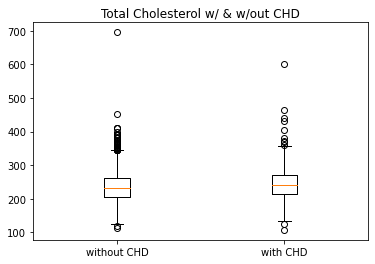

In [6]:
df = df[df['totChol'].notna()]

trueVals = []
falseVals = []
# for each thing in the dataframe
for index, row in df.iterrows():
    # get the ten year CHD values
    if row['TenYearCHD']:
        trueVals.append(row['totChol'])
    else:
        falseVals.append(row['totChol'])

# set up an even thiccer boxplot
pp.boxplot([falseVals, trueVals])
ax = pp.gca()
pp.title("Total Cholesterol w/ & w/out CHD")
pp.axes(ax).set_xticklabels(['without CHD', 'with CHD'])
pp.show()

## Question 7

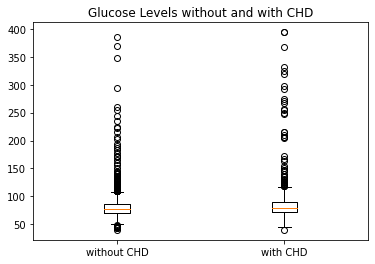

In [7]:
df = df[df['glucose'].notna()]

trueVals = []
falseVals = []
# loop through the dataframe
for index, row in df.iterrows():
    # get glucose values of if tenYearCHD and if not tenYearCHD
    if row['TenYearCHD']:
        trueVals.append(row['glucose'])
    else:
        falseVals.append(row['glucose'])

# set up the thiccest box plot 😳
pp.boxplot([falseVals, trueVals])
ax = pp.gca()
pp.title("Glucose Levels without and with CHD")
pp.axes(ax).set_xticklabels(['without CHD', 'with CHD'])
pp.show()

There is very little relation between the 10 year CHD occurence and glucose levels.